In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.integrate import quad

%matplotlib inline

In [2]:
x = np.array([ 1.,   1.5,  2.,   2.5,  3.,   3.5,  4.,   4.5,  5.,   5.5,  6.,   6.5,  7.,   7.5, 8.,   8.5,  9.,   9.5, 10. ])
y = np.array([3.43, 4.94, 6.45, 9.22, 6.32, 6.11, 4.63, 8.95, 7.8, 8.35, 11.45, 14.71, 11.97, 12.46, 17.42, 17.0, 15.45, 19.15, 20.86])

#### Fit a linear curve to the data ####

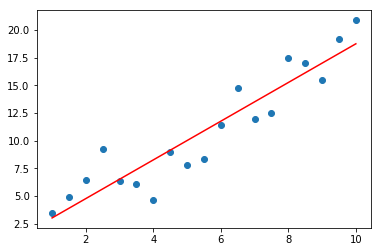

In [3]:
coefficients_lin = np.polyfit(x, y, 1)
y_lin = np.poly1d(coefficients_lin)

plt.scatter(x, y)
plt.plot(x, y_lin(x), 'r-')
#plt.title('y = '+ str(round(m, 3)) + 'x + '+ str(round(b, 3)))


#### Fit a cubic curve using the SciPy library

In [4]:
def cubic_func(x, a, b, c, d):
    return a*x**3 + b*x**2 + c*x + d

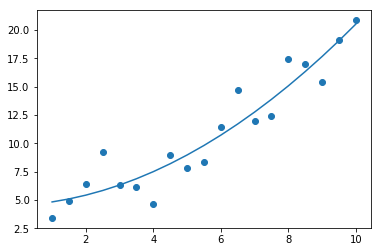

In [5]:
popt, pcov = curve_fit(cubic_func, x, y)
plt.scatter(x,y)
plt.plot(x, cubic_func(x, *popt))
#plt.title('y = ' + str(a) + 'x$^3$')

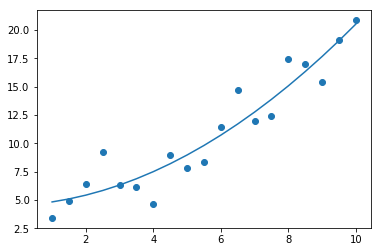

In [6]:
#Using polyfit -- not much of a difference between scipy and numpy here
coefficients_cub = np.polyfit(x, y, 3)
y_cub = np.poly1d(coefficients_cub)
plt.scatter(x,y)
plt.plot(x, y_cub(x))

#### Find the area underneath the cubic curve over the domain of the data using the tools in SciPy

In [7]:
g, h, i, j = popt
area = quad(cubic_func, np.min(x), np.max(x), args=(g, h, i, j))
print('Area under cubic curve = ', area[0])

Area under cubic curve =  96.94082706157427


#### Plot the data, the linear fit, and the cubic fit in Matplotlib. Make sure to give the plot a title and an x and y label. Save this figure and include it in your pull request!

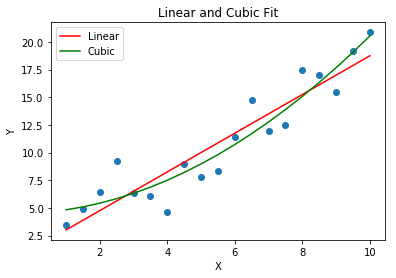

In [8]:
plt.scatter(x, y)
plt.plot(x, y_lin(x), 'r-', label='Linear')
plt.plot(x, cubic_func(x, *popt), 'g-', label='Cubic')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Linear and Cubic Fit')
plt.savefig('dskinner_01.png')

#### Put the area of the curve on the plot somewhere as text using Matplotlib

Text(0.5,1,'Linear and Cubic Fit')

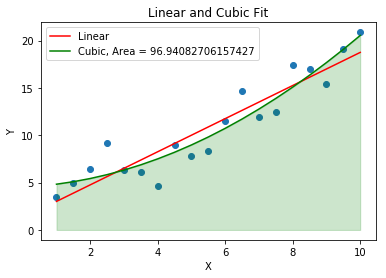

In [9]:
plt.scatter(x, y)
plt.plot(x, y_lin(x), 'r-', label='Linear')
plt.plot(x, cubic_func(x, *popt), 'g-', label='Cubic, Area = ' + str(area[0]))
string = str('Area = ' + str(area[0]))
plt.fill_between(x, cubic_func(x, *popt), alpha='0.2', color='green')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Linear and Cubic Fit')

#### Use the Bayesian information criterion to justify which model (linear or cubic) is preferable

In [10]:
def BIC(y, yhat, k, weight = 1):
    err = y - yhat
    sigma = np.std(np.real(err))
    n = len(y)
    B = n*np.log(sigma**2) + weight*k*np.log(n)
    return B

lin_bic = BIC(y,y_lin(x),2)
cub_bic = BIC(y, cubic_func(x, *popt), 4)
print('Linear BIC = ', lin_bic)
print('Cubic BIC = ', cub_bic)

Linear BIC =  29.9794913467
Cubic BIC =  30.3605761414


Since lower BIC is better, the linear model is preferable (but just barely).